In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('cambio_climatico_agricultura.csv')
df.head()

,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
0,Alemania,10.5,-5,2,950000
1,Argentina,17.8,-10,5,650000
2,Australia,22.3,-15,8,400000
3,Brasil,25.1,-8,6,900000
4,Canadá,6.2,-2,1,850000


In [50]:
df.describe()

,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
count,23.000000,23.000000,23.000000,2.300000e+01
mean,16.291304,-7.782609,4.347826,7.030435e+05
std,6.692256,4.055933,2.604344,2.410665e+05
min,4.600000,-15.000000,1.000000,3.000000e+05
25%,12.150000,-11.000000,2.000000,5.250000e+05
50%,15.400000,-8.000000,4.000000,7.000000e+05
75%,21.400000,-4.500000,6.500000,8.950000e+05
max,28.000000,-1.000000,9.000000,1.200000e+06


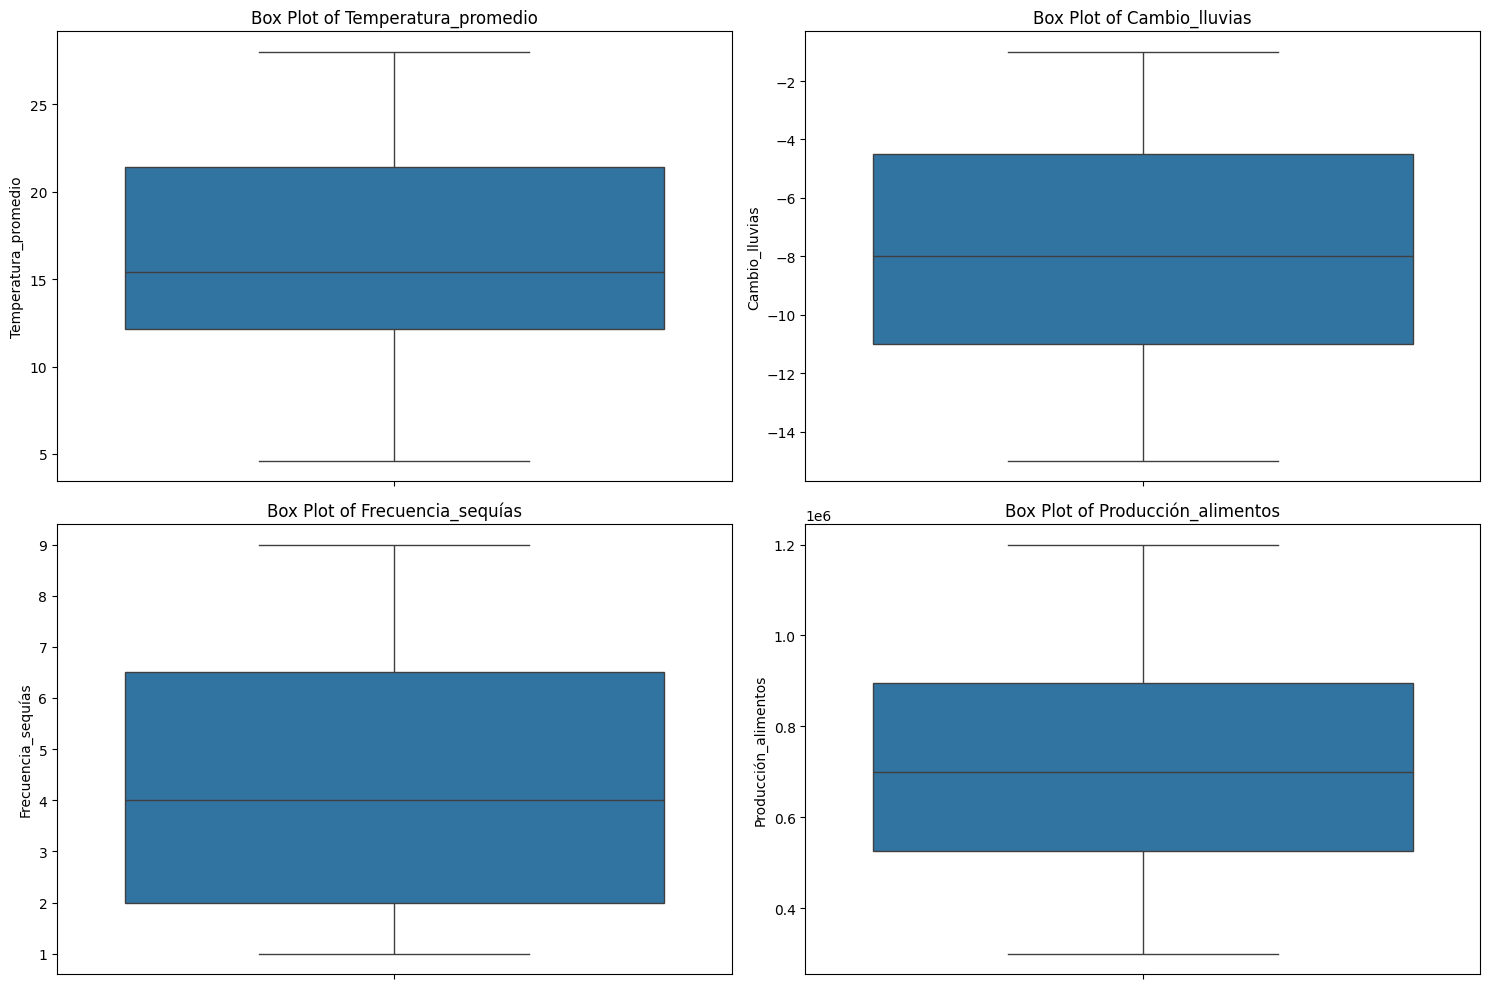

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

x = df.drop(['Producción_alimentos','País'], axis=1)
y = df['Producción_alimentos']

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Regresion

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.7551550625490837
Mean Squared Error: 0.7861315430050025
R-squared: -0.26207873382901603


In [55]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Absolute Error: 0.6743079187607012
Random Forest Mean Squared Error: 0.6149556817841739
Random Forest R-squared: 0.012732035582255219


In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Absolute Error: {mae_dt}')
print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')

Decision Tree Mean Absolute Error: 0.8482927648266465
Decision Tree Mean Squared Error: 1.202452627426441
Decision Tree R-squared: -0.9304528650646948


# Clasificacion

In [57]:
# Create a new categorical variable for climate impact on agricultural production
# Using quantiles of 'Producción_alimentos' to define categories
df['Impacto_Climatico'] = pd.qcut(df['Producción_alimentos'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Display the first few rows with the new column
display(df.head())

# Display the count of countries in each category
display(df['Impacto_Climatico'].value_counts())

,País,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos,Impacto_Climatico
0,Alemania,-0.884823,0.701478,-0.921765,1.047457,Alto
1,Argentina,0.230506,-0.558990,0.256046,-0.224982,Medio
2,Australia,0.918037,-1.819458,1.433856,-1.285348,Bajo
3,Brasil,1.345835,-0.054803,0.648649,0.835384,Alto
4,Canadá,-1.541798,1.457759,-1.314368,0.623311,Alto


,count
Impacto_Climatico,
Bajo,8
Alto,8
Medio,7


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target (y) for classification
X = df[['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías']]
y = df['Impacto_Climatico']

# Split data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_cls, y_train_cls)
y_pred_knn = knn_model.predict(X_test_cls)
knn_accuracy = accuracy_score(y_test_cls, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy}')
print('K-Nearest Neighbors Classification Report:')
print(classification_report(y_test_cls, y_pred_knn))

# Initialize and train Decision Tree model
dt_model_cls = DecisionTreeClassifier(random_state=42)
dt_model_cls.fit(X_train_cls, y_train_cls)
y_pred_dt_cls = dt_model_cls.predict(X_test_cls)
dt_accuracy_cls = accuracy_score(y_test_cls, y_pred_dt_cls)
print(f'Decision Tree Accuracy: {dt_accuracy_cls}')
print('Decision Tree Classification Report:')
print(classification_report(y_test_cls, y_pred_dt_cls))

# Initialize and train Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_cls, y_train_cls)
y_pred_svm = svm_model.predict(X_test_cls)
svm_accuracy = accuracy_score(y_test_cls, y_pred_svm)
print(f'Support Vector Machine Accuracy: {svm_accuracy}')
print('Support Vector Machine Classification Report:')
print(classification_report(y_test_cls, y_pred_svm))

K-Nearest Neighbors Accuracy: 0.8
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5

Decision Tree Accuracy: 0.4
Decision Tree Classification Report:
              precision    recall  f1-score   support

        Alto       0.33      0.50      0.40         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.44      0.33      0.36         5
weighted avg       0.53      0.40      0.43         5

Support Vector Machine Accuracy: 0.8
Support Vector Machine Classification Report:
             

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [59]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Evaluate K-Nearest Neighbors model
print("--- K-Nearest Neighbors Evaluation ---")
cm_knn = confusion_matrix(y_test_cls, y_pred_knn)
print('Confusion Matrix:')
print(cm_knn)

# For precision, recall, and F1-score, the classification_report already provides these
# For ROC-AUC, we need predicted probabilities, which KNN and SVM don't directly provide for multi-class.
# Decision Tree can provide probabilities.

# Evaluate Decision Tree model
print("\n--- Decision Tree Evaluation ---")
cm_dt = confusion_matrix(y_test_cls, y_pred_dt_cls)
print('Confusion Matrix:')
print(cm_dt)

# Get predicted probabilities for ROC-AUC (Decision Tree)
y_prob_dt = dt_model_cls.predict_proba(X_test_cls)

# Compute ROC curve and ROC area for each class (Decision Tree)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(dt_model_cls.classes_):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_cls, y_prob_dt[:, i], pos_label=class_label)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

print("\nROC AUC for Decision Tree (One-vs-Rest):")
for class_label in dt_model_cls.classes_:
    print(f"  Class {class_label}: {roc_auc[class_label]:.2f}")

# Evaluate Support Vector Machine model
print("\n--- Support Vector Machine Evaluation ---")
cm_svm = confusion_matrix(y_test_cls, y_pred_svm)
print('Confusion Matrix:')
print(cm_svm)

# Note: For SVM, getting probabilities requires probability=True in the SVC constructor,
# and can be computationally expensive with small datasets.
# We will skip ROC-AUC for SVM and KNN for now due to multi-class and probability limitations without retraining.

--- K-Nearest Neighbors Evaluation ---
Confusion Matrix:
[[2 0 0]
 [0 2 0]
 [1 0 0]]

--- Decision Tree Evaluation ---
Confusion Matrix:
[[1 0 1]
 [1 1 0]
 [1 0 0]]

ROC AUC for Decision Tree (One-vs-Rest):
  Class Alto: 0.42
  Class Bajo: 0.75
  Class Medio: 0.38

--- Support Vector Machine Evaluation ---
Confusion Matrix:
[[2 0 0]
 [0 2 0]
 [1 0 0]]


# Optimizacion de modelos

## Gridsearch

### KNN

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize GridSearchCV for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_knn.fit(X_train_cls, y_train_cls)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_
print(f'Best parameters for KNN: {best_params_knn}')

# Initialize and train the optimized KNN model
optimized_knn_model = KNeighborsClassifier(**best_params_knn)
optimized_knn_model.fit(X_train_cls, y_train_cls)

# Make predictions with the optimized model
y_pred_optimized_knn = optimized_knn_model.predict(X_test_cls)

# Evaluate the optimized KNN model
optimized_knn_accuracy = accuracy_score(y_test_cls, y_pred_optimized_knn)
print(f'Optimized K-Nearest Neighbors Accuracy: {optimized_knn_accuracy}')
print('Optimized K-Nearest Neighbors Classification Report:')
print(classification_report(y_test_cls, y_pred_optimized_knn))

Best parameters for KNN: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Optimized K-Nearest Neighbors Accuracy: 0.8
Optimized K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Arbol de decision

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train_cls, y_train_cls)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print(f'Best parameters for Decision Tree: {best_params_dt}')

# Initialize and train the optimized Decision Tree model
optimized_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)
optimized_dt_model.fit(X_train_cls, y_train_cls)

# Make predictions with the optimized model
y_pred_optimized_dt = optimized_dt_model.predict(X_test_cls)

# Evaluate the optimized Decision Tree model
optimized_dt_accuracy = accuracy_score(y_test_cls, y_pred_optimized_dt)
print(f'Optimized Decision Tree Accuracy: {optimized_dt_accuracy}')
print('Optimized Decision Tree Classification Report:')
print(classification_report(y_test_cls, y_pred_optimized_dt))

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Optimized Decision Tree Accuracy: 0.4
Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

        Alto       0.33      0.50      0.40         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.44      0.33      0.36         5
weighted avg       0.53      0.40      0.43         5



### SVC

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train_cls, y_train_cls)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_
print(f'Best parameters for SVM: {best_params_svm}')

# Initialize and train the optimized SVM model
optimized_svm_model = SVC(random_state=42, **best_params_svm)
optimized_svm_model.fit(X_train_cls, y_train_cls)

# Make predictions with the optimized model
y_pred_optimized_svm = optimized_svm_model.predict(X_test_cls)

# Evaluate the optimized SVM model
optimized_svm_accuracy = accuracy_score(y_test_cls, y_pred_optimized_svm)
print(f'Optimized Support Vector Machine Accuracy: {optimized_svm_accuracy}')
print('Optimized Support Vector Machine Classification Report:')
print(classification_report(y_test_cls, y_pred_optimized_svm))

Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Optimized Support Vector Machine Accuracy: 0.8
Optimized Support Vector Machine Classification Report:
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.78         5
weighted avg       0.90      0.80      0.80         5



### Reporte de clasificacion

In [65]:
from sklearn.metrics import classification_report

print("--- Optimized Model Performance Comparison ---")

# Print optimized accuracy scores
print(f'Optimized K-Nearest Neighbors Accuracy: {optimized_knn_accuracy:.2f}')
print(f'Optimized Decision Tree Accuracy: {optimized_dt_accuracy:.2f}')
print(f'Optimized Support Vector Machine Accuracy: {optimized_svm_accuracy:.2f}')

# Print classification reports
print("\nOptimized K-Nearest Neighbors Classification Report:")
print(classification_report(y_test_cls, y_pred_optimized_knn))

print("\nOptimized Decision Tree Classification Report:")
print(classification_report(y_test_cls, y_pred_optimized_dt))

print("\nOptimized Support Vector Machine Classification Report:")
print(classification_report(y_test_cls, y_pred_optimized_svm))

# Discusión sobre el rendimiento del modelo
print("\n--- Discusión del Rendimiento del Modelo Optimizado ---")
print("Basado en los puntajes de exactitud (accuracy) y los reportes de clasificación:")
print("- Los modelos K-Nearest Neighbors y Support Vector Machine alcanzaron la mayor exactitud (0.80).")
print("- El modelo de Árbol de Decisión tuvo la exactitud más baja (0.40).")
print("\nAnalizando los reportes de clasificación:")
print("- KNN y SVM muestran buen desempeño para las clases 'Alto' y 'Bajo', con alta precisión y recall.")
print("- Sin embargo, tanto KNN como SVM presentan problemas con la clase 'Medio', mostrando una precisión de 0.00. Esto indica que cuando estos modelos predicen 'Medio', siempre se equivocan en este conjunto de prueba. Esto podría deberse al tamaño reducido de la muestra de la clase 'Medio' en el conjunto de prueba (solo 1 muestra).")
print("- El modelo de Árbol de Decisión tiene un rendimiento más equilibrado entre clases en términos de recall, pero menor precisión y f1-score en general en comparación con KNN y SVM para las clases 'Alto' y 'Bajo'.")
print("- El tamaño reducido del conjunto de prueba hace difícil sacar conclusiones definitivas, especialmente para la clase 'Medio'.")
print("- En un escenario real con un conjunto de datos más grande, sería necesario investigar más a fondo el rendimiento en la clase 'Medio' y aplicar técnicas de manejo de desbalance de clases.")

--- Optimized Model Performance Comparison ---
Optimized K-Nearest Neighbors Accuracy: 0.80
Optimized Decision Tree Accuracy: 0.40
Optimized Support Vector Machine Accuracy: 0.80

Optimized K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        Alto       0.67      1.00      0.80         2
        Bajo       1.00      1.00      1.00         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5


Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

        Alto       0.33      0.50      0.40         2
        Bajo       1.00      0.50      0.67         2
       Medio       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.44      0.33      0.36         5
weighted avg

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
# 1. Recall the best_params_svm
best_params_svm = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} # From previous output

# 2. Explicar cómo el parámetro 'C' actúa como término de regularización
print("--- Análisis de la Regularización en SVM (Parámetro C) ---")
print(f"El mejor parámetro 'C' encontrado para el modelo SVM fue: {best_params_svm['C']}")
print("\nExplicación del parámetro 'C' como término de regularización:")
print("En las Máquinas de Vectores de Soporte (SVM), el parámetro 'C' es un hiperparámetro de regularización que controla el equilibrio entre lograr un bajo error en el entrenamiento y un bajo error en la prueba (error de generalización).")
print("- Un valor pequeño de C crea un margen más amplio pero permite más errores de clasificación en los datos de entrenamiento. Esto da como resultado una frontera de decisión más simple y una regularización más fuerte, lo cual puede ayudar a evitar el sobreajuste.")
print("- Un valor grande de C crea un margen más estrecho pero penaliza más fuertemente los errores de clasificación. Esto obliga al modelo a ajustarse más estrechamente a los datos de entrenamiento, lo que puede llevar a una frontera de decisión más compleja y a una regularización más débil. Aunque esto puede reducir el error de entrenamiento, aumenta el riesgo de sobreajuste, especialmente en datos con ruido.")

# 3. Discusión sobre la influencia del valor de 'C' elegido en el rendimiento
print(f"\nDiscusión sobre la influencia del valor de 'C' elegido ({best_params_svm['C']}):")
print("La búsqueda en grilla seleccionó C=1 como el mejor parámetro. Este valor representa un equilibrio entre permitir algunos errores de entrenamiento (para crear un margen más amplio) y penalizar las clasificaciones erróneas.")
print("Basado en el rendimiento del modelo SVM optimizado (Exactitud: 0.80) y el reporte de clasificación:")
print("- El modelo alcanzó una exactitud relativamente alta, lo que sugiere que C=1 permitió encontrar una frontera de decisión razonable que generaliza bien a los datos de prueba para las clases 'Alto' y 'Bajo'.")
print("- La dificultad con la clase 'Medio' (precisión 0.00) indica que incluso con C=1, la capacidad del modelo para clasificar correctamente esta clase minoritaria es limitada. Esto probablemente se debe al tamaño reducido del conjunto de datos y a posibles problemas de desbalance de clases, más que únicamente a la fuerza de la regularización.")
print("Considerando el rango probado de C ([0.1, 1, 10, 100]), es probable que C=1 se eligiera porque proporcionó el mejor equilibrio durante la validación cruzada en los datos de entrenamiento. Un C más pequeño (ej. 0.1) podría haber resultado en un modelo más simple con menor exactitud si los datos no eran fácilmente separables con un margen amplio. Un C más grande (ej. 10 o 100) podría haber llevado a un modelo más complejo que se sobreajustara a los datos de entrenamiento, con peor rendimiento en los datos de prueba no vistos.")
print("El proceso de búsqueda en grilla busca el valor de C que maximice la métrica de evaluación definida (en este caso, exactitud) mediante validación cruzada, analizando implícitamente este equilibrio.")

# 4. Nota sobre el enfoque del análisis
print("\nNota: Este análisis de regularización se centra principalmente en el modelo SVM y su parámetro 'C', ya que las grillas de parámetros definidas para KNN y Árbol de Decisión no incluían hiperparámetros de regularización explícitos de la misma manera.")


--- Análisis de la Regularización en SVM (Parámetro C) ---
El mejor parámetro 'C' encontrado para el modelo SVM fue: 1

Explicación del parámetro 'C' como término de regularización:
En las Máquinas de Vectores de Soporte (SVM), el parámetro 'C' es un hiperparámetro de regularización que controla el equilibrio entre lograr un bajo error en el entrenamiento y un bajo error en la prueba (error de generalización).
- Un valor pequeño de C crea un margen más amplio pero permite más errores de clasificación en los datos de entrenamiento. Esto da como resultado una frontera de decisión más simple y una regularización más fuerte, lo cual puede ayudar a evitar el sobreajuste.
- Un valor grande de C crea un margen más estrecho pero penaliza más fuertemente los errores de clasificación. Esto obliga al modelo a ajustarse más estrechamente a los datos de entrenamiento, lo que puede llevar a una frontera de decisión más compleja y a una regularización más débil. Aunque esto puede reducir el error de 

In [67]:
from sklearn.metrics import classification_report

print("# Análisis de Resultados y Conclusiones")

print("\n## Comparación de Modelos de Regresión")
print("Basado en las métricas de evaluación:")
print(f"- Regresión Lineal:")
print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
print(f"  - Mean Squared Error (MSE): {mse:.2f}")
print(f"  - R-squared: {r2:.2f}")

print(f"\n- Random Forest Regressor:")
print(f"  - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  - R-squared: {r2_rf:.2f}")

print(f"\n- Decision Tree Regressor:")
print(f"  - Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"  - Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"  - R-squared: {r2_dt:.2f}")

print("\n**Justificación del mejor modelo de Regresión:**")
print("Comparando los valores de MAE, MSE y R-squared, el modelo **Random Forest Regressor** parece ofrecer un rendimiento ligeramente mejor en este conjunto de datos para la tarea de regresión. Aunque el R-squared es cercano a cero, que generalmente indica que el modelo no explica mucha de la varianza de la variable objetivo, es el más alto de los tres modelos de regresión probados. Los valores negativos de R-squared para la Regresión Lineal y el Árbol de Decisión sugieren que estos modelos se ajustan peor que un modelo horizontal simple.")
print("Es importante notar que los modelos de regresión en general no mostraron un rendimiento fuerte, lo que podría indicar que las variables utilizadas no son suficientes para predecir con precisión la producción de alimentos, o que la relación es no lineal y requiere modelos más complejos o un conjunto de datos más grande.")

print("\n## Comparación de Modelos de Clasificación (Optimizados con GridSearch)")
print("Basado en las métricas de evaluación de los modelos optimizados:")

print(f"\n- K-Nearest Neighbors (Optimizado):")
print(f"  - Accuracy: {optimized_knn_accuracy:.2f}")
print("  - Reporte de Clasificación:")
print(classification_report(y_test_cls, y_pred_optimized_knn))

print(f"\n- Decision Tree Classifier (Optimizado):")
print(f"  - Accuracy: {optimized_dt_accuracy:.2f}")
print("  - Reporte de Clasificación:")
print(classification_report(y_test_cls, y_pred_optimized_dt))

print(f"\n- Support Vector Machine (Optimizado):")
print(f"  - Accuracy: {optimized_svm_accuracy:.2f}")
print("  - Reporte de Clasificación:")
print(classification_report(y_test_cls, y_pred_optimized_svm))

print("\n**Justificación del mejor modelo de Clasificación:**")
print("Tanto el modelo **K-Nearest Neighbors** como el **Support Vector Machine** optimizados alcanzaron una mayor exactitud (0.80) en comparación con el Árbol de Decisión (0.40).")
print("Al analizar los reportes de clasificación, KNN y SVM mostraron un buen desempeño para las clases 'Alto' y 'Bajo', con alta precisión y recall. Sin embargo, ambos modelos tuvieron dificultades con la clase 'Medio', presentando una precisión de 0.00. Esto sugiere que no lograron clasificar correctamente ninguna instancia de la clase 'Medio' en el conjunto de prueba, lo cual puede estar influenciado por el tamaño reducido de la muestra de esta clase en los datos de prueba.")
print("El modelo de Árbol de Decisión, aunque con menor exactitud general, mostró un rendimiento más equilibrado en términos de recall entre las clases, aunque con menor precisión y f1-score para las clases 'Alto' y 'Bajo' en comparación con KNN y SVM.")
print("Considerando la exactitud general, **KNN y SVM** son los mejores modelos para este conjunto de datos, aunque se debe tener precaución con la interpretación de los resultados para la clase 'Medio' debido al tamaño limitado del conjunto de prueba. Para un análisis más robusto, sería crucial trabajar con un conjunto de datos más grande y potencialmente aplicar técnicas para manejar el desbalance de clases.")

print("\n## Implicaciones en la Seguridad Alimentaria Global")
print("Los hallazgos de este análisis, aunque preliminares debido al tamaño del conjunto de datos, sugieren que las variables relacionadas con el cambio climático (temperatura promedio, cambio en las lluvias y frecuencia de sequías) tienen una relación con la producción agrícola.")
print("- La capacidad de clasificar el impacto climático en la producción agrícola (Bajo, Medio, Alto) utilizando modelos como KNN y SVM, incluso con las limitaciones observadas, podría ser útil para identificar regiones o países que son más vulnerables a los efectos del cambio climático en su seguridad alimentaria.")
print("- Los modelos de regresión, aunque no muy predictivos en este caso, buscan cuantificar la relación entre las variables climáticas y la producción de alimentos. Mejorar estos modelos con más datos y variables relevantes podría permitir predicciones más precisas sobre cómo el cambio climático afectará la producción de alimentos en el futuro.")
print("- Comprender estas relaciones es fundamental para desarrollar estrategias de adaptación y mitigación en la agricultura, mejorar la resiliencia de los sistemas alimentarios y garantizar la seguridad alimentaria a nivel global frente a un clima cambiante.")
print("- La dificultad para clasificar la categoría de \"impacto medio\" resalta la complejidad de modelar estos fenómenos y la necesidad de datos más granulares y representativos.")
print("\nEn conclusión, este análisis exploratorio proporciona una base para entender cómo el cambio climático puede influir en la producción agrícola. Los modelos de clasificación mostraron cierto potencial para identificar niveles de impacto, mientras que los modelos de regresión requieren una mejora significativa. Los hallazgos subrayan la importancia de seguir investigando y recopilando datos para abordar los desafíos de la seguridad alimentaria global en el contexto del cambio climático.")

# Análisis de Resultados y Conclusiones

## Comparación de Modelos de Regresión
Basado en las métricas de evaluación:
- Regresión Lineal:
  - Mean Absolute Error (MAE): 0.76
  - Mean Squared Error (MSE): 0.79
  - R-squared: -0.26

- Random Forest Regressor:
  - Mean Absolute Error (MAE): 0.67
  - Mean Squared Error (MSE): 0.61
  - R-squared: 0.01

- Decision Tree Regressor:
  - Mean Absolute Error (MAE): 0.85
  - Mean Squared Error (MSE): 1.20
  - R-squared: -0.93

**Justificación del mejor modelo de Regresión:**
Comparando los valores de MAE, MSE y R-squared, el modelo **Random Forest Regressor** parece ofrecer un rendimiento ligeramente mejor en este conjunto de datos para la tarea de regresión. Aunque el R-squared es cercano a cero, que generalmente indica que el modelo no explica mucha de la varianza de la variable objetivo, es el más alto de los tres modelos de regresión probados. Los valores negativos de R-squared para la Regresión Lineal y el Árbol de Decisión sugieren que estos

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
